# Predicting Loan Defaults w/ Natural Language Processing (NLP) #
## 5.0 Enhanced Modelling with NLP (TF) ##

Created on Tues Feb 12 21:59:23 2019

@author: Greenwood Group

## STEP 5: Enhanced Modelling with NLP (TF) ##

### 5.1 Import required libraries ###

In [19]:
# System libraries
import os
import sys
import time
import warnings

# Basic Python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ML libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.externals import joblib
from imblearn.over_sampling import SMOTE

# ### Turn off Depreciation and Future warnings
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

if not sys.warnoptions:
    warnings.simplefilter('ignore')

% matplotlib inline

pd.set_option('precision', 3) # set the precision of numerical representation
pd.set_option('expand_frame_repr', True)

### 5.2 Prepare for reproducability ###

In [20]:
# Set random seed to maintain reproducability
random_state = np.random.seed(123)

# Set the plotting style
plt.style.use('seaborn-whitegrid')

sns.set(style="whitegrid", palette="PRGn", color_codes=True, font='sans-serif', font_scale=1.5)

### 5.3 Import data ###

In [21]:
# Import the dataset
# Set the path to data
filename = '../data/processed/4.1-gg-processed-text-data-tf-model.csv'

# Read the data into memory
%time df = pd.read_csv(filename)

CPU times: user 719 ms, sys: 102 ms, total: 821 ms
Wall time: 830 ms


In [22]:
df

,status,loan_amount,sector_Agriculture,sector_Arts,sector_Clothing,sector_Construction,sector_Education,sector_Entertainment,sector_Food,sector_Health,...,990,991,992,993,994,995,996,997,998,999
0,0,500.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,500.0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,500.0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,500.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,500.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1000.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,300.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,300.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,150.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,300.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 3.4 Separate dependent (target) and independent variables ###

In [23]:
# Separate dependent (target) and independent variables
%time x = df.iloc[:, 1:].values # independent variables (not including text)
%time y = df.iloc[:, 0].values # dependent variable

CPU times: user 48.3 ms, sys: 44.9 ms, total: 93.2 ms
Wall time: 93.3 ms
CPU times: user 187 µs, sys: 5 µs, total: 192 µs
Wall time: 196 µs


### 3.5 Examine the encoded dependent and independent variables ###

In [24]:
print("Data in x: \n{}".format(x))
print("\nShape of x: {}".format(x.shape))
print("\nData in y: \n{}".format(y))
print("\nShape of y: {}".format(y.shape))

Data in x: 
[[500.   1.   0. ...   0.   0.   0.]
 [500.   0.   0. ...   0.   0.   0.]
 [500.   0.   0. ...   0.   0.   0.]
 ...
 [775.   0.   0. ...   0.   0.   0.]
 [275.   0.   0. ...   0.   0.   0.]
 [275.   0.   0. ...   0.   0.   0.]]

Shape of x: (7988, 1019)

Data in y: 
[0 0 0 ... 1 1 1]

Shape of y: (7988,)


### 3.6 Split training and test data ###

In [25]:
# Load and split the data
%time X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = random_state)

CPU times: user 115 ms, sys: 64.5 ms, total: 179 ms
Wall time: 179 ms


### 3.7 Feature scaling ###

In [26]:
# Feature scaling
# Standardization - x_stand = (x - mean(x)) / standard deviation (x)
# Normalization - x_norm = (x - min(x)) / (max(x) - min(x))

sc_x = StandardScaler()
%time X_train = sc_x.fit_transform(X_train)
%time X_test = sc_x.transform(X_test)

CPU times: user 120 ms, sys: 39 ms, total: 159 ms
Wall time: 158 ms
CPU times: user 11.3 ms, sys: 6.05 ms, total: 17.3 ms
Wall time: 16.9 ms


### 3.8 Examine the training and test data ###

In [27]:
print("No. of transactions in the X_train dataset: ", X_train.shape)
print("No. of transactions in the y_train dataset: ", y_train.shape)
print("No. of transactions in the X_test dataset: ", X_test.shape)
print("No. of transactions in the y_test dataset: ", y_test.shape)
print("\nCounts of label '1' (paid) before oversampling: {}".format(sum(y_train == 1)))
print("Counts of label '0' (defaulted) before oversampling: {} \n".format(sum(y_train == 0)))

# Oversample the training data using SMOTE
sm = SMOTE(random_state=42, ratio = 1.0)
X_train, y_train = sm.fit_sample(X_train, y_train.ravel())

print('Shape of X_train after oversampling: {}'.format(X_train.shape))
print('Shape of y_train after oversampling: {} \n'.format(y_train.shape))
print("Counts of label '1' (paid) after oversampling: {}".format(sum(y_train == 1)))
print("Counts of label '0' (defaulted) after oversampling: {}".format(sum(y_train == 0)))

No. of transactions in the X_train dataset:  (5991, 1019)
No. of transactions in the y_train dataset:  (5991,)
No. of transactions in the X_test dataset:  (1997, 1019)
No. of transactions in the y_test dataset:  (1997,)

Counts of label '1' (paid) before oversampling: 3425
Counts of label '0' (defaulted) before oversampling: 2566 

Shape of X_train after oversampling: (6850, 1019)
Shape of y_train after oversampling: (6850,) 

Counts of label '1' (paid) after oversampling: 3425
Counts of label '0' (defaulted) after oversampling: 3425


### 3.10 Setup the pipelines for the models to be used ###

In [28]:
# Logistic Regression (LogReg) model
pipe_lr = Pipeline([('clf', LogisticRegression(random_state = random_state))])

# Random Forest (RF) model
pipe_rf = Pipeline([('clf', RandomForestClassifier(random_state = random_state))])

# Support Vector Machine (SVM) model
pipe_svm = Pipeline([('clf', SVC(random_state = random_state))])

# XGBoost model
pipe_xgb = Pipeline([('clf', XGBClassifier(random_state = random_state))])

# ExtraTrees model
pipe_xtc = Pipeline([('clf', ExtraTreesClassifier(random_state = random_state))])

# AdaBoost model
pipe_ab = Pipeline([('clf', AdaBoostClassifier(random_state = random_state))])


### 3.11 Setup the grid search parameters for the models to be used ###

In [29]:
# GridSearch hyperparameters for LR models
grid_params_lr = [{'clf__penalty': ['l1', 'l2'], # used to specify the norm used in the penalization
                   'clf__C': [0.001, 0.01, 0.1, 1, 10, 100, 200, 500], # inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.
                   'clf__solver': ['liblinear']}]  # algorithm to use in the optimization problem

# GridSearch hyperparameters for RF models
grid_params_rf = [{'clf__bootstrap': [True],
                   'clf__criterion': ['entropy', 'gini'], # function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. Note: this parameter is tree-specific.
                   'clf__max_depth': [None], # maximum depth of the tree
                   'clf__max_features': ['auto'],
                   'clf__max_leaf_nodes': [None],
                   'clf__min_impurity_decrease': [0.0],
                   'clf__min_impurity_split': [None],
                   'clf__min_samples_leaf': [1, 5, 10, 20, 30, 50], # minimum number of samples required to be at a leaf node
                   'clf__min_samples_split': [2, 4, 6, 8, 10, 12, 15], # minimum number of samples required to split an internal node
                   'clf__n_estimators': [25, 50, 100, 200, 300, 400, 500, 1000],
                   'clf__oob_score': [False]}] 

# GridSearch hyperparameters for SVM models
grid_params_svm = [{'clf__kernel': ['rbf'], # 'linear'], # specifies the kernel type to be used in the algorithm
                    'clf__C': [0.001, 0.01, 0.1, 1, 10, 100]}] # penalty parameter C of the error term

# GridSearch hyperparameters for XGBoost models
grid_params_xgb = [{'clf__objective':['binary:logistic'], 
                    'clf__n_estimators': [50, 100, 500, 1000],
                    'clf__learning_rate': [0.01, 0.05, 0.1],
                    'clf__max_depth': [5, 10, 50],
                    'clf__eval_metric': ['auc'],
                    'clf__subsample': [0.9, 1],
                    'clf__seed': [42]}]

# GridSearch hyperparameters for ExtraTrees models
grid_params_xtc = [{'clf__n_estimators': [25, 50, 100, 200, 300, 400, 500],
                    'clf__criterion': ['entropy'], 
                    'clf__max_depth': [None], 
                    'clf__min_samples_split': [2, 3, 4, 6, 8, 10, 12, 15], 
                    'clf__min_samples_leaf': [1, 2, 3, 5, 10, 20, 30, 50],
                    'clf__min_weight_fraction_leaf': [0.0], 
                    'clf__max_features': ['auto'],
                    'clf__max_leaf_nodes': [None], 
                    'clf__min_impurity_decrease': [0.0], 
                    'clf__min_impurity_split': [None], 
                    'clf__bootstrap': [False],
                    'clf__oob_score': [False]}]
                    
# GridSearch hyperparameters for AdaBoost models
grid_params_ab = [{'clf__base_estimator': [None],
                    'clf__n_estimators': [50, 100, 200, 300, 400, 500],
                    'clf__learning_rate': [0.01, 0.1, 1.0],
                    'clf__algorithm': ['SAMME.R']}]


### 3.12 Construct grid searches ###

In [30]:
jobs = -1

gs_lr = GridSearchCV(estimator = pipe_lr, # is assumed to implement the scikit-learn estimator interface
                     param_grid = grid_params_lr, # dictionary with parameters names (string) as keys and lists of parameter settings to try as values
                     scoring = 'roc_auc', # metric(s) used to evaluate the predictions on the test set
                     cv = 10) # cross-validation splitting strategy (k-fold cross-validation)

gs_rf = GridSearchCV(estimator = pipe_rf,
                     param_grid = grid_params_rf,
                     scoring = 'roc_auc',
                     cv = 10,
                     n_jobs = jobs)

gs_svm = GridSearchCV(estimator = pipe_svm,
                      param_grid = grid_params_svm,
                      scoring = 'roc_auc',
                      cv = 10,
                      n_jobs = jobs)

gs_xgb = GridSearchCV(estimator = pipe_xgb,
                      param_grid = grid_params_xgb,
                      scoring = 'roc_auc',
                      cv = 10,
                      n_jobs = jobs)

gs_xtc = GridSearchCV(estimator = pipe_xtc,
                      param_grid = grid_params_xtc,
                      scoring = 'roc_auc',
                      cv = 10,
                      n_jobs = jobs)

gs_ab = GridSearchCV(estimator = pipe_ab,
                      param_grid = grid_params_ab,
                      scoring = 'roc_auc',
                      cv = 10,
                      n_jobs = jobs)


### 3.13 List pipelines and dictionary of pipeline and gridsearch classifiers ###

In [31]:
# List of grids
#grids = [gs_ab]
grids = [gs_lr, gs_rf, gs_svm, gs_xgb, gs_xtc, gs_ab]

In [32]:
grid_dict = {0: 'Logistic Regression',
             1: 'Random Forest',
             2: 'Support Vector Machine',
             3: 'XGBoost',
             4: 'Extra Trees',
             5: 'AdaBoost'}
#grid_dict = {0: 'AdaBoost'}


### 3.14 Define model structures ###

In [33]:
def model_results(grids, grid_dict, model_type='Enhanced Model (TF)'):
    # Add a timer
    start = time.time()

    # Fit the grid search objects
    print('\nPerforming {} optimizations...'.format(model_type))

    best_f1_score = 0.0
    best_roc_auc = 0.0
    best_clf = 0
    best_gs = ''
    
    # Process each GridSearch object in sequence
    for idx, gs in enumerate(grids):

                print('\nEstimator: {} - {}'.format(grid_dict[idx], model_type))
                # Fit grid search
                gs.fit(X_train, y_train)
                # Best params for this grid search
                print('\nBest params: {}'.format(gs.best_params_))
                # Best training data accuracy for this grid search
                print('\nTraining set accuracy score for best params: {0:.3f}%'.format(gs.best_score_ * 100))
                # Predict on test data with best params
                y_pred = gs.predict(X_test)
                # Test data accuracy and confusion matrix of model with best params
                print('Test set accuracy score for best params: {0:.3f}%'.format(accuracy_score(y_test, y_pred) * 100))
                print('\nConfusion Matrix:\n {}'.format(confusion_matrix(y_test, y_pred)))

                FP = confusion_matrix(y_test, y_pred)[0][1]
                FN = confusion_matrix(y_test, y_pred)[1][0]
                TP = confusion_matrix(y_test, y_pred)[1][1]
                TN = confusion_matrix(y_test, y_pred)[0][0]
                
                type_1_error = FP / (FP + FN + TP +TN)
                type_2_error = FN / (FP + FN + TP +TN)
                
                # Print details about the confusion matrix
                print('\nTP: {}'.format(TP))
                print('TN: {}'.format(TN))
                print('FP: {}'.format(FP))
                print('FN: {}'.format(FN))
                
                print('\nType I Error (percent): {0:.3f}%'.format(type_1_error * 100))
                print('Type II Error (percent): {0:.3f}%'.format(type_2_error * 100)) 
                print('\nClassification Report:\n {}'.format(classification_report(y_test, y_pred)))

                print(grid_dict[idx])

                if grid_dict[idx] != 'Random Forest' and grid_dict[idx] != 'Random Forest w PCA' and grid_dict[idx] != 'XGBoost' and grid_dict[idx] != 'Extra Trees':
                    y_pred_sample_score = gs.decision_function(X_test)
                else:
                    y_pred_sample_score = gs.predict_proba(X_test)[:, 1]

                fpr, tpr, _ = roc_curve(y_test, y_pred_sample_score)
                roc_auc = auc(fpr,tpr)

                # Plot the Receiver Operating Characteristic (ROC) Curve
                fig = plt.figure(figsize=(16,9))
                plt.title('ROC Curve: {} - {}'.format(grid_dict[idx], model_type), fontsize=20)
                plt.plot(fpr, tpr, 'b', label = 'AUC = {0:.4f}'.format(roc_auc), linewidth=3)
                plt.legend(loc = 'lower right', fontsize=36)
                plt.plot([0, 1],[0, 1],'r--', linewidth=3)
                plt.xlim([-0.1, 1.0])
                plt.ylim([-0.1, 1.01])
                plt.ylabel('True Positive (TP) Rate', fontsize=20)
                plt.xlabel('False Positive (FP) Rate', fontsize=20)
                plt.tick_params(axis='both', which='major', labelsize=16)
                plt.show()

                fig.savefig('../reports/figures/5.1_gg_roc_curve_{}_{}.png'.format(grid_dict[idx].replace(" ", "_").lower(), model_type.replace(" ", "_").lower()), bbox_inches='tight')

                print('\nROC Area Under the Curve (AUC): {0:.4f}%'.format(roc_auc * 100))

                elapsed_time = int(time.time() - start)

                print('\nElapsed time in minutes: {0:.3f}'.format(0.1 * round((elapsed_time) / 6)))

                # Track best (highest roc_auc) model
                if roc_auc > best_roc_auc:

                    best_roc_auc = roc_auc
                    best_gs = gs
                    best_clf = idx

#    df_results.append(pd.DataFrame(grid_dict[idx].replace(" ", "_").lower(), best_roc_auc) , ignore_index=True)
    
    print('\nClassifier with best test set roc_auc: {} Model'.format(grid_dict[best_clf]))

    # Elapsed time in minutes
    elapsed_time = int(time.time() - start)
    print('\nTotal elapsed time in minutes: {0:.3f}'.format(0.1 * round((elapsed_time) / 6)))

    # Add an end of work message
    os.system('say "your {} {} has finished training"'.format(grid_dict[best_clf], model_type))
    
    # Save best grid search pipeline to file
    dump_file = '../models/best_gs_pipeline_model_{}_{}.pkl'.format(grid_dict[best_clf].replace(" ", "_").lower(), model_type.replace(" ", "_").lower())
    joblib.dump(best_gs, dump_file, compress = 1)

    print('\nSaved {} grid search pipeline model to file: {}'.format(grid_dict[best_clf], dump_file))


Performing Enhanced Model (TF) optimizations...

Estimator: Logistic Regression - Enhanced Model (TF)

Best params: {'clf__C': 0.1, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}

Training set accuracy score for best params: 97.931%
Test set accuracy score for best params: 92.689%

Confusion Matrix:
 [[ 766   79]
 [  67 1085]]

TP: 1085
TN: 766
FP: 79
FN: 67

Type I Error (percent): 3.956%
Type II Error (percent): 3.355%

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.91       845
           1       0.93      0.94      0.94      1152

   micro avg       0.93      0.93      0.93      1997
   macro avg       0.93      0.92      0.92      1997
weighted avg       0.93      0.93      0.93      1997

Logistic Regression


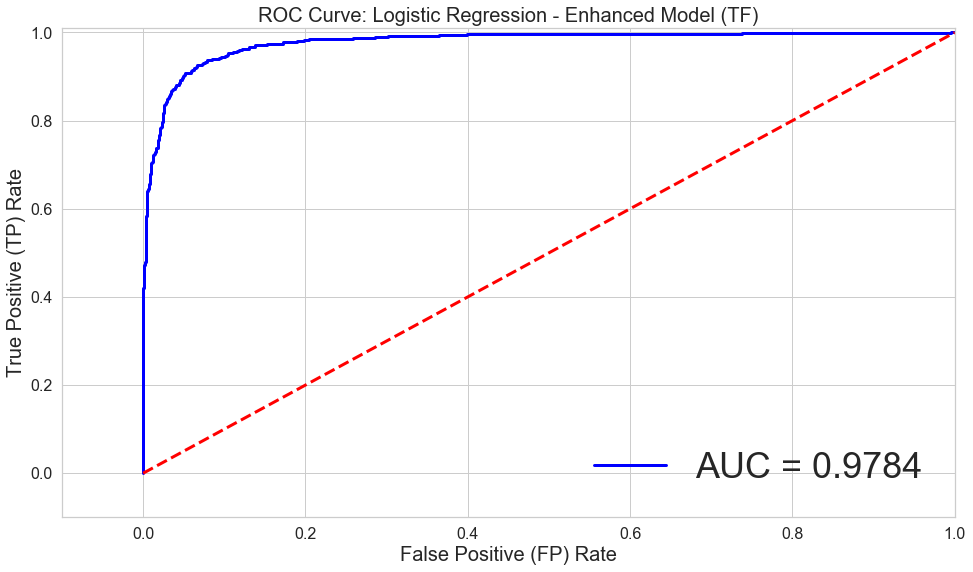


ROC Area Under the Curve (AUC): 97.8437%

Elapsed time in minutes: 0.100

Estimator: Random Forest - Enhanced Model (TF)

Best params: {'clf__bootstrap': True, 'clf__criterion': 'entropy', 'clf__max_depth': None, 'clf__max_features': 'auto', 'clf__max_leaf_nodes': None, 'clf__min_impurity_decrease': 0.0, 'clf__min_impurity_split': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 10, 'clf__n_estimators': 500, 'clf__oob_score': False}

Training set accuracy score for best params: 98.799%
Test set accuracy score for best params: 93.640%

Confusion Matrix:
 [[ 760   85]
 [  42 1110]]

TP: 1110
TN: 760
FP: 85
FN: 42

Type I Error (percent): 4.256%
Type II Error (percent): 2.103%

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.92       845
           1       0.93      0.96      0.95      1152

   micro avg       0.94      0.94      0.94      1997
   macro avg       0.94      0.93      0.93      1997
weighted

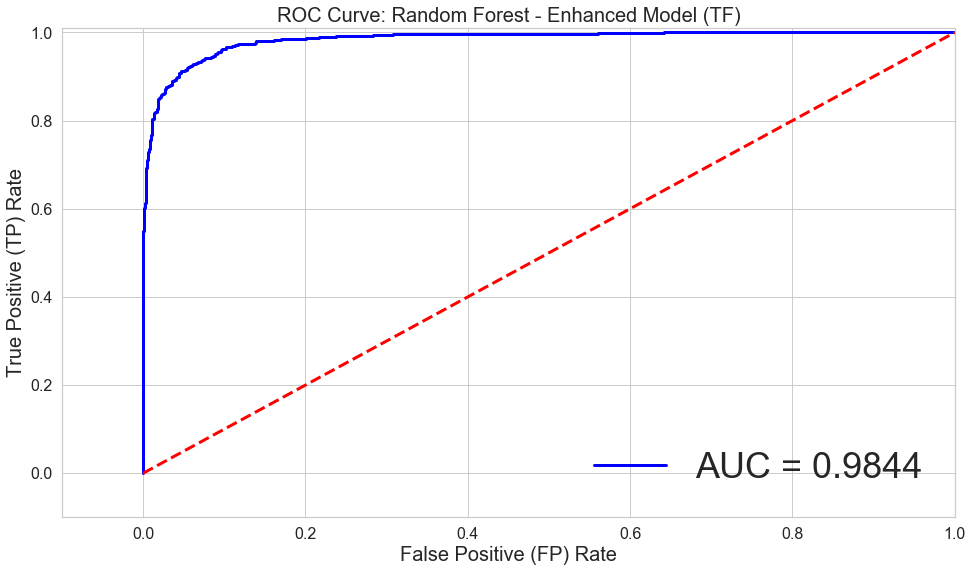


ROC Area Under the Curve (AUC): 98.4351%

Elapsed time in minutes: 2.000

Estimator: Support Vector Machine - Enhanced Model (TF)

Best params: {'clf__C': 10, 'clf__kernel': 'rbf'}

Training set accuracy score for best params: 97.886%
Test set accuracy score for best params: 91.938%

Confusion Matrix:
 [[ 755   90]
 [  71 1081]]

TP: 1081
TN: 755
FP: 90
FN: 71

Type I Error (percent): 4.507%
Type II Error (percent): 3.555%

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90       845
           1       0.92      0.94      0.93      1152

   micro avg       0.92      0.92      0.92      1997
   macro avg       0.92      0.92      0.92      1997
weighted avg       0.92      0.92      0.92      1997

Support Vector Machine


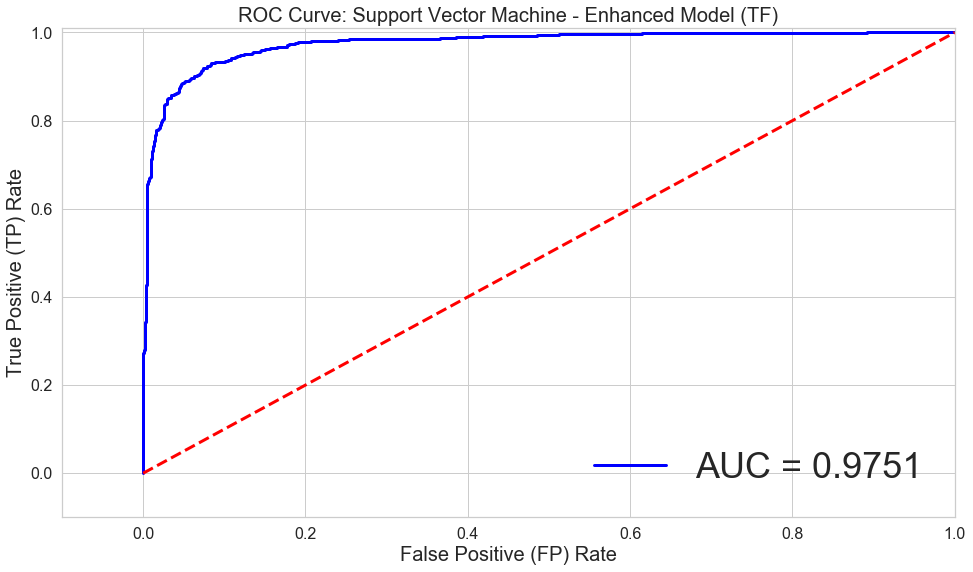


ROC Area Under the Curve (AUC): 97.5051%

Elapsed time in minutes: 4.800

Estimator: XGBoost - Enhanced Model (TF)

Best params: {'clf__eval_metric': 'auc', 'clf__learning_rate': 0.01, 'clf__max_depth': 50, 'clf__n_estimators': 1000, 'clf__objective': 'binary:logistic', 'clf__seed': 42, 'clf__subsample': 0.9}

Training set accuracy score for best params: 99.079%
Test set accuracy score for best params: 94.842%

Confusion Matrix:
 [[ 782   63]
 [  40 1112]]

TP: 1112
TN: 782
FP: 63
FN: 40

Type I Error (percent): 3.155%
Type II Error (percent): 2.003%

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       845
           1       0.95      0.97      0.96      1152

   micro avg       0.95      0.95      0.95      1997
   macro avg       0.95      0.95      0.95      1997
weighted avg       0.95      0.95      0.95      1997

XGBoost


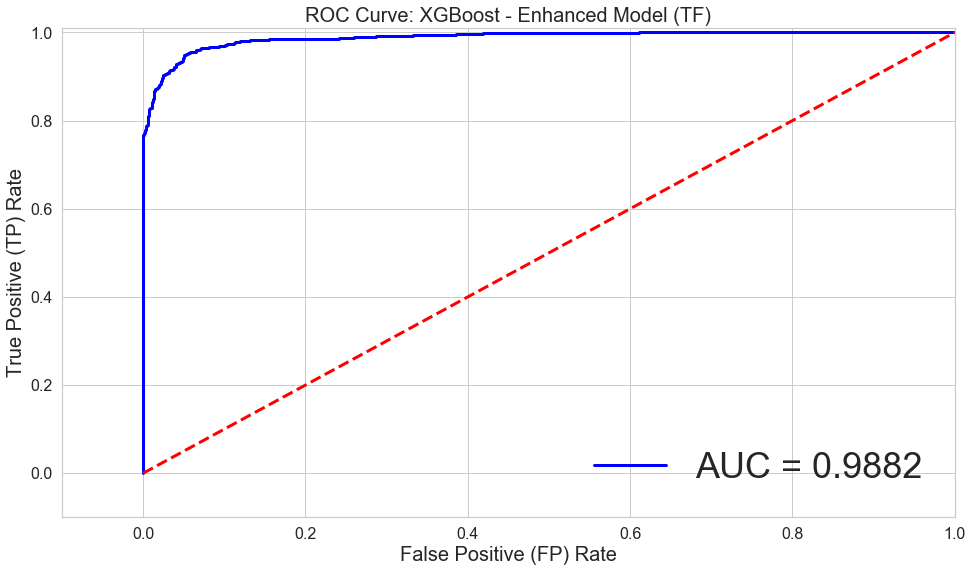


ROC Area Under the Curve (AUC): 98.8165%

Elapsed time in minutes: 70.900

Estimator: Extra Trees - Enhanced Model (TF)

Best params: {'clf__bootstrap': False, 'clf__criterion': 'entropy', 'clf__max_depth': None, 'clf__max_features': 'auto', 'clf__max_leaf_nodes': None, 'clf__min_impurity_decrease': 0.0, 'clf__min_impurity_split': None, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 3, 'clf__min_weight_fraction_leaf': 0.0, 'clf__n_estimators': 50, 'clf__oob_score': False}

Training set accuracy score for best params: 98.722%
Test set accuracy score for best params: 93.941%

Confusion Matrix:
 [[ 765   80]
 [  41 1111]]

TP: 1111
TN: 765
FP: 80
FN: 41

Type I Error (percent): 4.006%
Type II Error (percent): 2.053%

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93       845
           1       0.93      0.96      0.95      1152

   micro avg       0.94      0.94      0.94      1997
   macro avg       0.94   

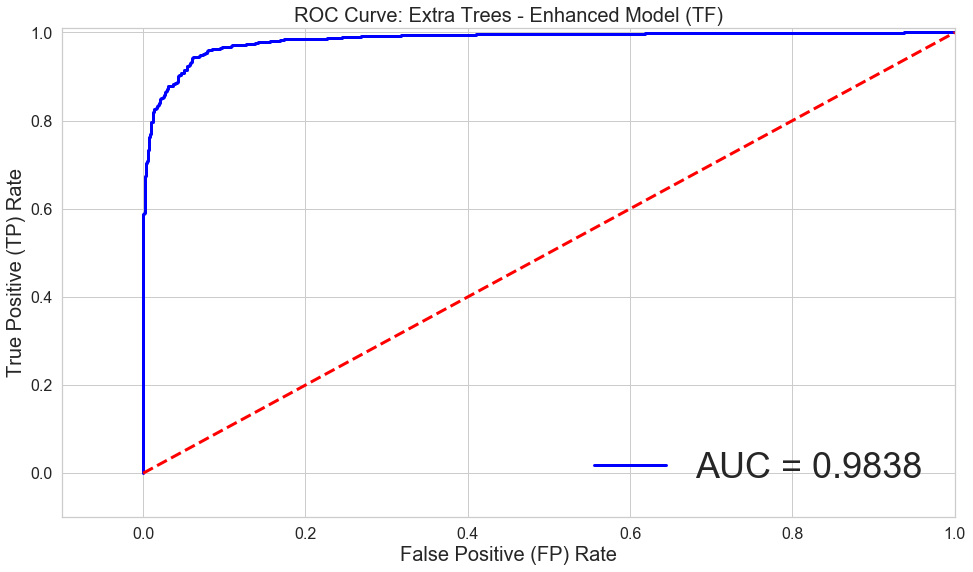


ROC Area Under the Curve (AUC): 98.3807%

Elapsed time in minutes: 71.100

Estimator: AdaBoost - Enhanced Model (TF)

Best params: {'clf__algorithm': 'SAMME.R', 'clf__base_estimator': None, 'clf__learning_rate': 1.0, 'clf__n_estimators': 100}

Training set accuracy score for best params: 97.872%
Test set accuracy score for best params: 92.639%

Confusion Matrix:
 [[ 766   79]
 [  68 1084]]

TP: 1084
TN: 766
FP: 79
FN: 68

Type I Error (percent): 3.956%
Type II Error (percent): 3.405%

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.91       845
           1       0.93      0.94      0.94      1152

   micro avg       0.93      0.93      0.93      1997
   macro avg       0.93      0.92      0.92      1997
weighted avg       0.93      0.93      0.93      1997

AdaBoost


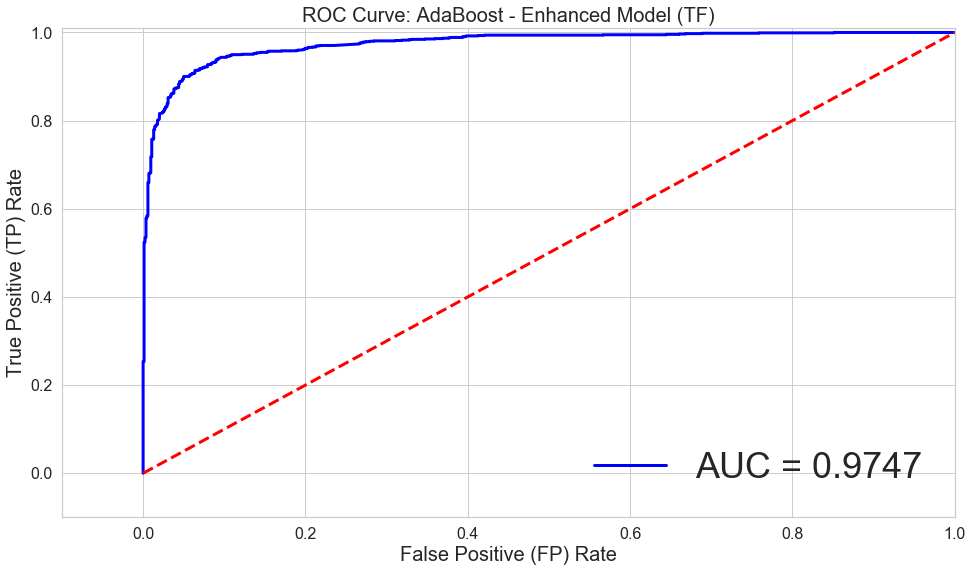


ROC Area Under the Curve (AUC): 97.4705%

Elapsed time in minutes: 72.700

Classifier with best test set roc_auc: XGBoost Model

Total elapsed time in minutes: 72.700

Saved XGBoost grid search pipeline model to file: ../models/best_gs_pipeline_model_xgboost_enhanced_model_(tf).pkl


In [34]:
# Run the models
model_results(grids, grid_dict, model_type="Enhanced Model (TF)")